# Problem Statement

    Pada zaman sekarang tentu teknologi menjadi suatu hal yang penting dalam kehidupan manusia, dan salah satu teknologi yang mudah dibawa dan hampir semua orang miliki adalah telefon genggam(Hp). Persaingan dalam meraup untung dalam proses jual beli Hp semakin ketat. Salah satu yang penting adalah memberikan HARGA YANG TEPAT untuk Hp yang memiliki spesifikasi tertentu, akan sangat membantu apabila dapat membuat suatu model yang dapat menentukan range harga suatu Hp.
    Bila terjadi salah menentukan harga akan fatal. Apabila suatu telfon genggam memiliki  spesifikasi jelek tapi harganya tinggi maka tidak ada yang akan beli, sebaliknya apabila spesifikasi sangat bagus maka akan banyak pembeli namun untung yang didapatkan juga semakin minim. Maka dari itu dibutuhkan model yang dapat menentukan harga yang tepat untuk sebuah telfon genggam.
    
# GOALS
    - Mencari spesifikasi/feature telfon genggam yang memiliki pengaruh tinggi terhadap range harga.
    - Mencari Model yang TEPAT untuk memprediksi range harga yang paling tepat. Pada kasus Model dikatakan TEPAT apabila memiliki evaluasi matrix(F1-score) yang cenderung tinggi dan tidak overfitting/underfitting.

# Deskripsi Kolom
## Kolom independent ( x ):
    - index = nomor id yang bersifat unik bernilai integer positif
    - daya_baterai = total energi yang disimpan dalam baterai (satuan mAh)
    - bluetooth = memiliki Bluetooth atau tidak (1: ya; 0: tidak)
    - kecepatan_clock = kecepatan prosesor melaksanakan instruksi
    - dual_sim = memiliki kapabilitas penggunaan dual sim (1:ya; 0:tidak)
    - kamera_depan = besar resolusi penggunaan kamera depan (satuan MegaPixels)
    - four_g = memiliki kapabilitas konektivitas 4G (1:ya; 0:tidak)
    - memori_internal = Besar memori internal (satuan GB)
    - tebal_hp = tebal Handphone (satuan cm)
    - berat_hp = massa Handphone (satuan gram)
    - jumlah_prosesor = jumlah core dalam prosesor (satuan buah)
    - kamera_belakang_mp = besar resolusi penggunaan kamera belakang (satuan MegaPixels)
    - px_panjang = panjang resolusi piksel
    - px_lebar = lebar resolusi piksel
    - kapasitas_ram = kapasitas Random Access Memory (satuan MB)
    - panjang_layar = panjang layar (satuan cm)
    - lebar_layar = lebar layar (satuan cm)
    - waktu_telepon = waktu telfon terlama yang bisa dilakukan dari HP tercas penuh hingga habis (satuan jam)
    - three_g = memiliki kapabilitas konektivitas 3G (1:ya; 0:tidak)
    - touch_screen = memiliki layar sentuh (1:ya; 0:tidak)
    - wifi = memiliki wifi (1:ya; 0:tidak)
## Kolom dependent ( y / Target)
    - price_range - rentang harga kisaran HP (0-3000)
        Kolom ini akan dibinning menjadi :
            1. 0 : 0-<1000k
            2. 1 : 1000k- <2000k
            3. 2 : 2000k-3000k
            4. 3 : >3000k

# Import Data and Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as ss

%matplotlib inline

In [2]:
df = pd.read_csv("./Data/train.csv")
pd.options.display.max_columns = 22
df.head()

,index,daya_baterai,bluetooth,kecepatan_clock,dual_sim,kamera_depan,four_g,memori_internal,tebal_hp,berat_hp,jumlah_prosesor,kamera_belakang_mp,px_panjang,px_lebar,kapasitas_ram,panjang_layar,lebar_layar,waktu_telfon,three_g,touch_screen,wifi,price_range
0,1045,531,0,1.1,0,10,Tidak,63,0.7,189,7,14,145,1903,2958,17.0,1,19,0,1,0,2000k-3000k
1,937,764,1,1.2,1,1,Tidak,13,1.0,152,8,2,361,511,3148,18.0,7,6,1,1,0,2000k-3000k
2,1658,1812,1,1.3,1,4,Ya,42,1.0,162,7,15,380,1550,3338,18.0,13,11,1,1,1,>3000k
3,529,1821,0,0.9,0,9,Ya,12,0.3,114,1,18,97,1803,2430,7.0,4,6,1,1,1,2000k-3000k
4,895,1790,1,2.3,1,3,Ya,49,0.5,100,3,11,396,1980,3568,6.0,2,18,1,0,1,>3000k


In [3]:
df["price_range"].unique()

array(['2000k-3000k', '>3000k', '0-<1000k', '1000k-<2000k'], dtype=object)

## Melakukan Re-Categorized terhadap kolom kategorikal
==> memudahkan untuk memahami proses visualisasi

In [4]:
# recategorized kolom target :
    #1. 0 : 0-<1000k
    #2. 1 : 1000k-<2000k
    #3. 2 : 2000k-3000k
    #4. 3 : >3000k
def recat_y(x) :
    '''
    recat_y = fungsi yg digunakan untuk re-kategori isi dari kolom yang nantinya akan di 
              apply kepada fungsi ini
    x = parameter dari fungsi recat_y, yang nantinya adalah nama kolom yang akan di apply
        fungsi ini
    '''
    if x == "0-<1000k":
        return 0
    elif x == "1000k-<2000k":
        return 1
    elif x == "2000k-3000k":
        return 2
    elif x == ">3000k":
        return 3
df["price_range"] = df["price_range"].apply(recat_y)
        
df.head()

,index,daya_baterai,bluetooth,kecepatan_clock,dual_sim,kamera_depan,four_g,memori_internal,tebal_hp,berat_hp,jumlah_prosesor,kamera_belakang_mp,px_panjang,px_lebar,kapasitas_ram,panjang_layar,lebar_layar,waktu_telfon,three_g,touch_screen,wifi,price_range
0,1045,531,0,1.1,0,10,Tidak,63,0.7,189,7,14,145,1903,2958,17.0,1,19,0,1,0,2
1,937,764,1,1.2,1,1,Tidak,13,1.0,152,8,2,361,511,3148,18.0,7,6,1,1,0,2
2,1658,1812,1,1.3,1,4,Ya,42,1.0,162,7,15,380,1550,3338,18.0,13,11,1,1,1,3
3,529,1821,0,0.9,0,9,Ya,12,0.3,114,1,18,97,1803,2430,7.0,4,6,1,1,1,2
4,895,1790,1,2.3,1,3,Ya,49,0.5,100,3,11,396,1980,3568,6.0,2,18,1,0,1,3


In [5]:
df["price_range"].unique()
## semua isi kolom target sudah di kategorikan ulang menjadi 0,1,2 dan 3.

array([2, 3, 0, 1], dtype=int64)

In [6]:
## Melakukan Recategorized pada semua kolom yang bersifat kategorical
# bertujuan agar pada saat plot bisa mudah dimengerti saja
# apabila pada saat EDA, ternyata kolom-kolom ini memiliki pengaruh yang signifikan terhadap price_range
# maka akan dilakukan encoding kembali, agar bisa dilakukan prose machine learning.
def recat_cat(x):
    '''
    recat_cat = membuat function untuk mengkategorikan ulang feature kategorikal.
    x = setiap isi dari kolom kategorikal yang akan diproses.
    '''
    if x == 0:
        return "Tidak"
    elif x== 1:
        return "Ya"
kategorik = ["bluetooth","dual_sim","three_g","touch_screen","wifi"]
for i in kategorik:
    df[i] = df[i].apply(recat_cat)

In [7]:
df.info()
# semua feature sudah memiliki tipe yang benar, kecuali untuk feature targetnya.
# tapi nanti akan dilakukan binning, dan akan menjadi target, sehingga tidak perlu diubah tipe datanya.
# kemudian juga terdapat 2 kolom yang memiliki missing value, maka nanti akan dilakukan handling missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               1500 non-null   int64  
 1   daya_baterai        1500 non-null   int64  
 2   bluetooth           1500 non-null   object 
 3   kecepatan_clock     1450 non-null   float64
 4   dual_sim            1500 non-null   object 
 5   kamera_depan        1500 non-null   int64  
 6   four_g              1500 non-null   object 
 7   memori_internal     1500 non-null   int64  
 8   tebal_hp            1500 non-null   float64
 9   berat_hp            1500 non-null   int64  
 10  jumlah_prosesor     1500 non-null   int64  
 11  kamera_belakang_mp  1500 non-null   int64  
 12  px_panjang          1500 non-null   int64  
 13  px_lebar            1500 non-null   int64  
 14  kapasitas_ram       1500 non-null   int64  
 15  panjang_layar       1381 non-null   float64
 16  lebar_

In [8]:
df.describe(include="all").T

## STATISTIKA DESPKRIPTIF 
# kolom "count" merupakan banyaknya jumlah data, apabila jumlahnya tidak 1500, artinya terdapat missing value
# kolom "unique" biasa untuk tipe feature kategorikal, yang menunjukkan jumlah unik dalam kolom tersebut.
# kolom "top" juga biasa untuk tipe feature kategorikal, ,yang menunjukkan data yang paling sering muncul pada kolom tersebut. 
# kolom "freq" juga biasa untuk tipe feature kategorikal, yang menunjukkan jumlah dari data yang paling banyak muncul di kolom tersebut.
# kolom "mean" biasa untuk feature numerikal, memunuculkan nilai rata-rata dari kolom tersebut.
# kolom "std" biasa untuk feature numerikal, memunuculkan nilai standar deviasi dari kolom tersebut.
# kolom "min" biasa untuk feature numerikal, memunculkan nilai terkecil pada kolom tersebut.
# kolom "25%" biasa untuk feature numerikal, memunculkan nilai percentile 25% pada kolom tersebut.
# kolom "50%" biasa untuk feature numerikal, memunculkan nilai percentile 50% pada kolom tersebut.
# kolom "75%" biasa untuk feature numerikal, memunculkan nilai percentile 75% pada kolom tersebut.
# kolom "max" biasa untuk feature numerikal, memunculkan nilai terbesar pada kolom tersebut.



## Mencari feature yang datanya tidak masuk akal
# kamera depan 0 mp, mungkin saja terjadi, karena hp tersebut tidak ada kamera.
# Menurut saya lebar layar tidak mungkin dibawah 5cm, maka untuk berikutnya hanya akan saya ambil yang lebarnya lebih dari 5cm
# kemudian untuk panjang pixel tidak mungkin 0, minimal menurut saya adalah 1.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,1500,NaN,NaN,NaN,1005.63,575.774,0,509.75,1005,1509.25,1998
daya_baterai,1500,NaN,NaN,NaN,1233.11,441.85,501,840.75,1222.5,1608.5,1998
bluetooth,1500,2,Tidak,768,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kecepatan_clock,1450,NaN,NaN,NaN,1.54731,0.833468,0.5,0.7,1.6,2.3,3
dual_sim,1500,2,Ya,771,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kamera_depan,1500,NaN,NaN,NaN,4.188,4.24398,0,1,3,7,16
four_g,1500,2,Ya,775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
memori_internal,1500,NaN,NaN,NaN,31.9527,18.3239,2,16,31,48,64
tebal_hp,1500,NaN,NaN,NaN,0.501467,0.288352,0.1,0.2,0.5,0.8,1
berat_hp,1500,NaN,NaN,NaN,139.175,35.0872,80,108,139,169,200


In [9]:
df = df.drop(df[(df["lebar_layar"] < 5) | (df["px_panjang"] < 1)].index,axis=0)
## Untuk mengambil yang layarnya diatas 4cm dan panjang resolusi pixel diatas 0 
## Karena keduanya menurut saya tidak mungkin ada.

In [10]:
df.describe(include="all").T

# lebar layar sudah terseleksi untuk minimal 5cm dan panjang resolusi pixel diatas 0

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,817,NaN,NaN,NaN,1008.78,573.911,0,518,997,1514,1998
daya_baterai,817,NaN,NaN,NaN,1217.51,443.434,501,831,1191,1597,1998
bluetooth,817,2,Tidak,417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kecepatan_clock,790,NaN,NaN,NaN,1.52177,0.823195,0.5,0.625,1.6,2.275,3
dual_sim,817,2,Ya,410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kamera_depan,817,NaN,NaN,NaN,4.06854,4.10108,0,1,3,6,16
four_g,817,2,Ya,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
memori_internal,817,NaN,NaN,NaN,31.5753,18.2083,2,15,30,47,64
tebal_hp,817,NaN,NaN,NaN,0.500122,0.290895,0.1,0.2,0.5,0.8,1
berat_hp,817,NaN,NaN,NaN,139.084,35.5041,80,107,141,169,200


In [11]:
desc_phone =[]

for i in df.columns: #mengiterasi i di setiap kolom pada airbnbl
    desc_phone.append([ #menambahkan hasil i, tipe data, jumlah NaN, persentase nan yang dibulatkan , jumlah unique, unique nya ke dalam list airbnb_describe
        i,
        df[i].dtypes,#tipe
        df[i].isna().sum(),#jumlah NaN
        round((((df[i].isna().sum())/(len(df)))*100),2),#Persentase jumlah NaN
        df[i].nunique(),#Jumlah Unique
        df[i].unique() #Unique
    ])
desc = pd.DataFrame(desc_phone, columns=['Columns','Type','NaN','%NaN','NUnique','Unique'])
desc

## Tabel ini bertujuan untuk memperlihatkan jumlah missing value dan persentasenya.
# NaN merupakan jumlah missing value
# %NaN merupakan persentase jumlah missing value ==> pada kasus ini karena persentasenya dibawah 20% maka akan dilakukan handling missing value
# NUnique merupakan jumlah unique pada feature
# Unique merupakan nilai unik dari setiap kolom.

,Columns,Type,NaN,%NaN,NUnique,Unique
0,index,int64,0,0.00,817,"[937, 1658, 1128, 953, 676, 1800, 518, 884, 27..."
1,daya_baterai,int64,0,0.00,618,"[764, 1812, 1671, 852, 1027, 1358, 1606, 841, ..."
2,bluetooth,object,0,0.00,2,"[Ya, Tidak]"
3,kecepatan_clock,float64,27,3.30,25,"[1.2, 1.3, 0.5, 1.6, 1.7, 1.4, 0.6, 2.9, nan, ..."
4,dual_sim,object,0,0.00,2,"[Ya, Tidak]"
5,kamera_depan,int64,0,0.00,17,"[1, 4, 13, 6, 2, 0, 3, 8, 9, 5, 11, 12, 14, 10..."
6,four_g,object,0,0.00,2,"[Tidak, Ya]"
7,memori_internal,int64,0,0.00,63,"[13, 42, 5, 54, 64, 60, 57, 39, 7, 31, 19, 9, ..."
8,tebal_hp,float64,0,0.00,10,"[1.0, 0.9, 0.4, 0.6, 0.1, 0.3, 0.8, 0.2, 0.5, ..."
9,berat_hp,int64,0,0.00,121,"[152, 162, 179, 147, 103, 154, 199, 114, 125, ..."


# Handling Missing Value

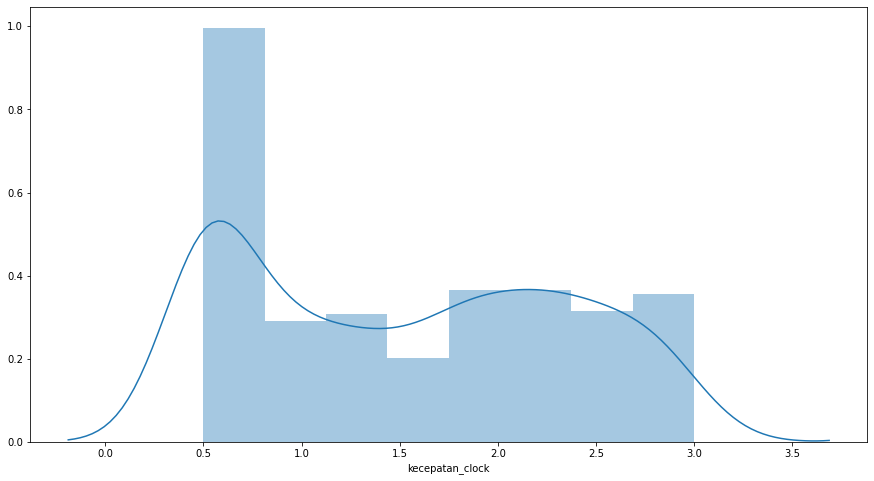

In [12]:
plt.figure(figsize=(15,8))
fig = sns.distplot(df["kecepatan_clock"])
plt.show(fig)
## Kolom "kecepatan_clock"
# Karena data tidak berdistribusi dengan normal, saya prefer untuk mengisi missing value dengan median agar leboih merepresentasikan seluruh data

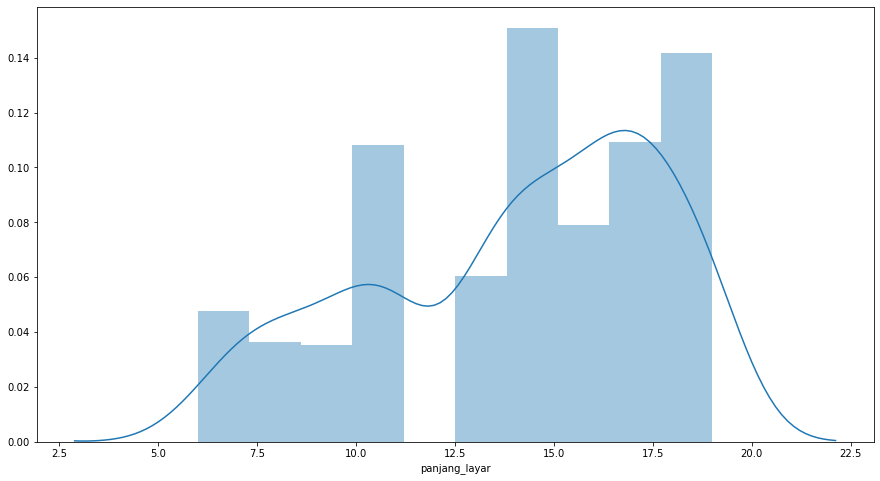

In [13]:
plt.figure(figsize=(15,8))
fig = sns.distplot(df["panjang_layar"])
plt.show(fig)

## Kolom "panjang_layar"
# Karena pada kolom ini juga tidak berdistribusi secara normal, saya mengisi missing value dengan median

In [14]:
filler ={
    "kecepatan_clock" : df["kecepatan_clock"].median(),
    "panjang_layar" : df["panjang_layar"].median()
}
df = df.fillna(filler)

In [15]:
df.isna().sum()

## Terlihat bahwa handling missing value berhasil, karena sudah tidak ada missing value.

index                 0
daya_baterai          0
bluetooth             0
kecepatan_clock       0
dual_sim              0
kamera_depan          0
four_g                0
memori_internal       0
tebal_hp              0
berat_hp              0
jumlah_prosesor       0
kamera_belakang_mp    0
px_panjang            0
px_lebar              0
kapasitas_ram         0
panjang_layar         0
lebar_layar           0
waktu_telfon          0
three_g               0
touch_screen          0
wifi                  0
price_range           0
dtype: int64

## Outliers

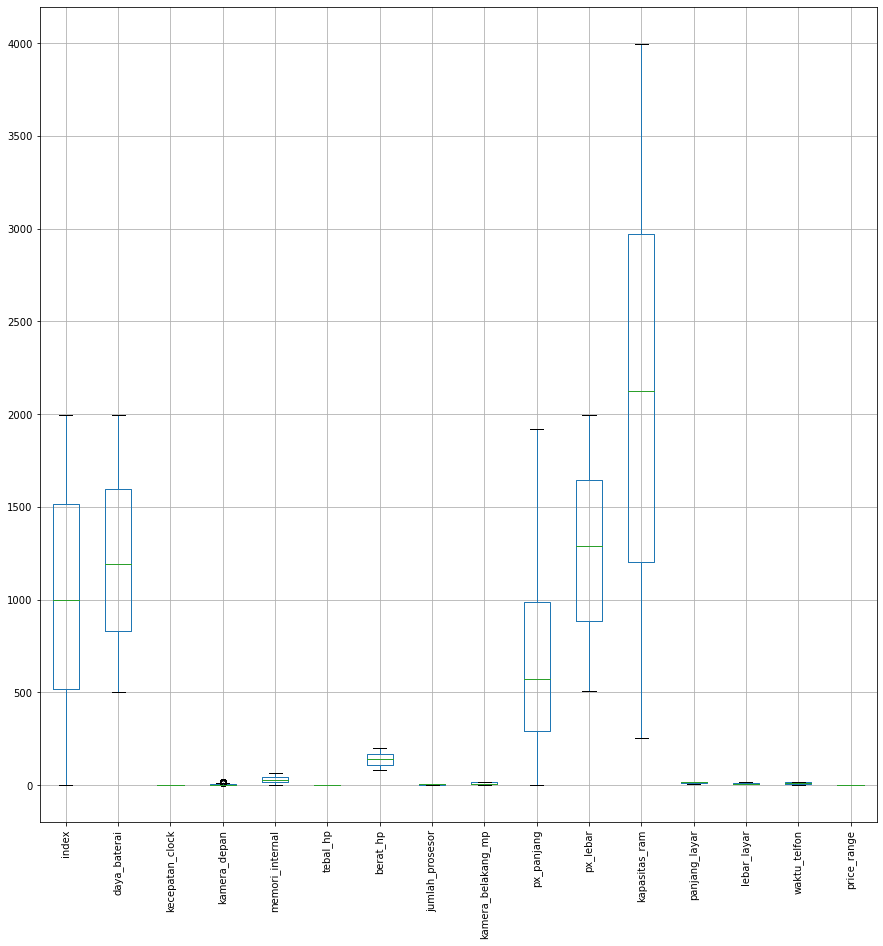

In [16]:
plt.figure(figsize=(15,15))
fig = df.boxplot()
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show()
# terdapat outliers pada kolom kamera depan

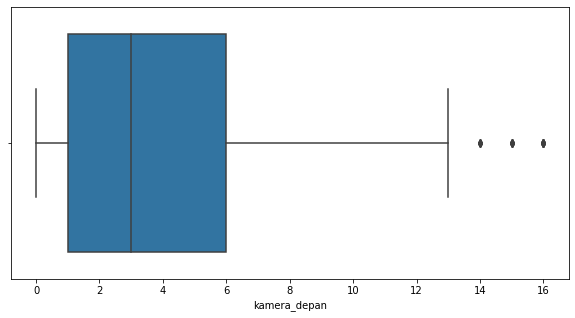

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(df["kamera_depan"])
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show()
# karena mungkin saja ada kamera yang kamera depannya diatas 13 mp jadi outliers akan dibiarkan ada.

# Exploratory Data Analysis

In [18]:
df.columns
## index sudah pasti tidak berpengaruh, maka tidak akan dilakukan plot

Index(['index', 'daya_baterai', 'bluetooth', 'kecepatan_clock', 'dual_sim',
       'kamera_depan', 'four_g', 'memori_internal', 'tebal_hp', 'berat_hp',
       'jumlah_prosesor', 'kamera_belakang_mp', 'px_panjang', 'px_lebar',
       'kapasitas_ram', 'panjang_layar', 'lebar_layar', 'waktu_telfon',
       'three_g', 'touch_screen', 'wifi', 'price_range'],
      dtype='object')

# Dependent Variable

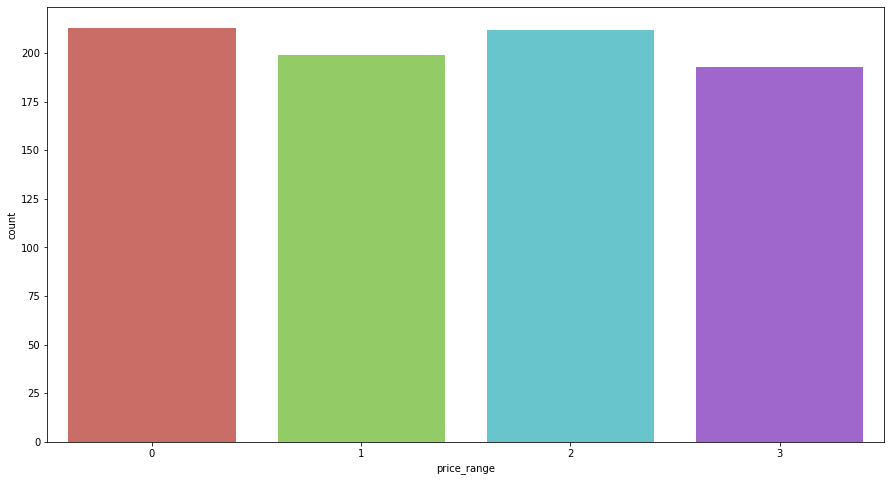

In [19]:
plt.figure(figsize=(15,8))
fig = sns.countplot(x=df["price_range"],palette="hls")
fig.set_xticklabels(fig.get_xticklabels(),rotation=0)
plt.show(fig)

In [20]:
pd.crosstab(index = df["price_range"],columns = "Jumlah").sort_values(by="Jumlah",ascending=False)

col_0,Jumlah
price_range,
0,213
2,212
1,199
3,193


In [21]:
pd.crosstab(index = df["price_range"],columns = "%price_range",normalize=True).sort_values(by="%price_range",ascending=False)
# data balance, jadi tidak perlu dilakukan handling imbalance data

col_0,%price_range
price_range,
0,0.260710
2,0.259486
1,0.243574
3,0.236230


## KOLOM CONTINUOUS

### Daya Baterai

In [22]:
baterai = pd.crosstab(df["price_range"],columns = "Rata-Rata baterai",values=df["daya_baterai"],aggfunc="mean")
baterai
# dari tabel bisa dilihat bahwa daya tahan baterai memiliki pengaruh
# karena semakin tinggi daya baterai(rata-rata) price range nya juga tinggi

col_0,Rata-Rata baterai
price_range,
0,1069.441315
1,1206.879397
2,1231.764151
3,1376.233161


<Figure size 864x360 with 0 Axes>

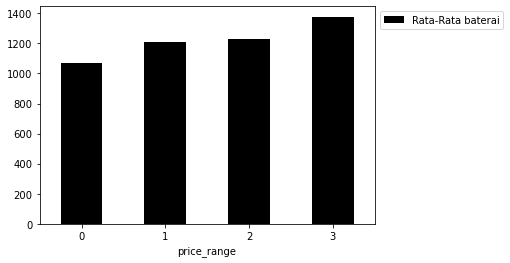

In [23]:
plt.figure(figsize=(12,5))
fig = baterai.plot(kind="bar",color="black")
fig.set_xticklabels(fig.get_xticklabels(),rotation=0)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### Kecepatan Clock

In [24]:
kecepatan = pd.crosstab(df["price_range"],columns = "Rata-Rata kecepatan",values=df["kecepatan_clock"],aggfunc="mean")
kecepatan

col_0,Rata-Rata kecepatan
price_range,
0,1.545540
1,1.489447
2,1.511321
3,1.551295


<Figure size 864x360 with 0 Axes>

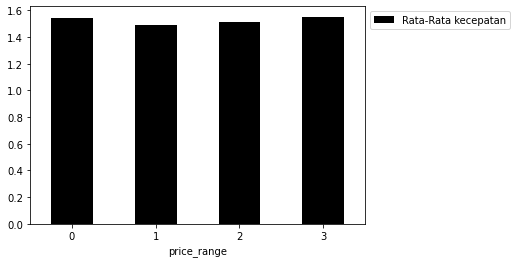

In [25]:
plt.figure(figsize=(12,5))
fig = kecepatan.plot(kind="bar",color="black")
fig.set_xticklabels(fig.get_xticklabels(),rotation=0)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

# untuk price range 0 dan 3 angkanya tidak ada perbedaan yang signifikan
# pengaruhnya cukup kecil

### Kamera Depan

In [26]:
kamera_depan = pd.crosstab(df["price_range"],columns = "Rata-Rata kamera depan",values=df["kamera_depan"],aggfunc="mean")
kamera_depan

col_0,Rata-Rata kamera depan
price_range,
0,4.201878
1,4.050251
2,3.919811
3,4.103627


<Figure size 864x360 with 0 Axes>

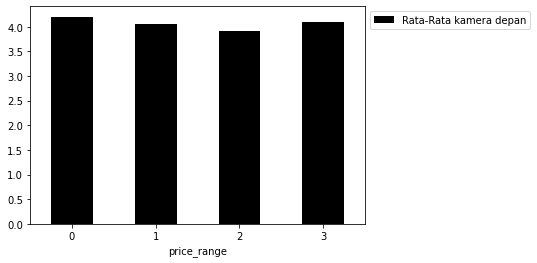

In [27]:
plt.figure(figsize=(12,5))
fig = kamera_depan.plot(kind="bar",color="black")
fig.set_xticklabels(fig.get_xticklabels(),rotation=0)
plt.legend(bbox_to_anchor=(1,1))
plt.show()
## pengaruhnya juga tidak begitu terlihat.

In [28]:
memori_internal = pd.crosstab(df["price_range"],columns = "Rata-Rata memori internal",values=df["memori_internal"],aggfunc="mean")
memori_internal

col_0,Rata-Rata memori internal
price_range,
0,28.985915
1,32.407035
2,31.165094
3,34.025907


<Figure size 864x360 with 0 Axes>

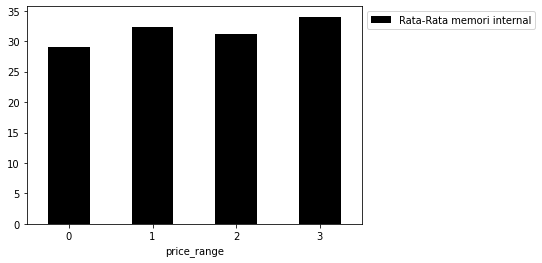

In [29]:
plt.figure(figsize=(12,5))
fig = memori_internal.plot(kind="bar",color="black")
fig.set_xticklabels(fig.get_xticklabels(),rotation=0)
plt.legend(bbox_to_anchor=(1,1))
plt.show()
## menununjukkan adanya pengaruh terhadap price, tapi tidak terlalu signifikan.

### Tebal dan Berat Hp

In [30]:
tebal = pd.crosstab(df["price_range"],columns = "Rata-Rata tebal hp",values=df["tebal_hp"],aggfunc="mean")
tebal

col_0,Rata-Rata tebal hp
price_range,
0,0.492019
1,0.506533
2,0.500943
3,0.501554


In [31]:
berat = pd.crosstab(df["price_range"],columns = "Rata-Rata berat hp",values=df["berat_hp"],aggfunc="mean")
berat

# panjang dan lebar tidak memiliki pengaruh yang signifikan terhadap price range

col_0,Rata-Rata berat hp
price_range,
0,139.544601
1,137.728643
2,144.231132
3,134.321244


### Kamera Belakang Hp

In [32]:
kamera_belakang = pd.crosstab(df["price_range"],columns = "Rata-Rata kamera belakang",values=df["kamera_belakang_mp"],aggfunc="mean")
kamera_belakang

# tidak memiliki pengaruh yang signifikan

col_0,Rata-Rata kamera belakang
price_range,
0,9.779343
1,9.457286
2,9.627358
3,9.290155


### Panjang dan Lebar Resolusi Pixel

In [33]:
px_panjang = pd.crosstab(df["price_range"],columns = "Rata-Rata panjang resolusi pixel",values=df["px_panjang"],aggfunc="mean")
px_panjang

col_0,Rata-Rata panjang resolusi pixel
price_range,
0,546.859155
1,656.929648
2,658.136792
3,793.015544


In [34]:
px_lebar = pd.crosstab(df["price_range"],columns = "Rata-Rata panjang resolusi pixel",values=df["px_lebar"],aggfunc="mean")
px_lebar

# untuk panjang dan lebar pada resolusi pixel memiliki pengaruh yang signifikan terhadap range harga
# semakin tinggi panjang dan lebar resolusi pixel semakin tinggi harga yang bisa dipatok

col_0,Rata-Rata panjang resolusi pixel
price_range,
0,1198.079812
1,1242.713568
2,1237.801887
3,1413.569948


### Kapasitas RAM

In [35]:
kapasitas = pd.crosstab(df["price_range"],columns = "Rata-Rata kapasitas ram",values=df["kapasitas_ram"],aggfunc="mean")
kapasitas

## dapat dilihat bahwa kapasitas ram memiliki pengaruh yg signifikan terhadap harga

col_0,Rata-Rata kapasitas ram
price_range,
0,780.558685
1,1726.844221
2,2560.127358
3,3439.398964


### Panjang dan Lebar Layar

In [36]:
panjang_layar = pd.crosstab(df["price_range"],columns = "Rata-Rata panjang layar",values=df["panjang_layar"],aggfunc="mean")
panjang_layar
## panjang laayr tidak memiliki pengaruh yang signifikan terhadap harga hp

col_0,Rata-Rata panjang layar
price_range,
0,14.187793
1,14.296482
2,13.665094
3,14.373057


In [37]:
lebar_layar = pd.crosstab(df["price_range"],columns = "Rata-Rata lebar layar",values=df["lebar_layar"],aggfunc="mean")
lebar_layar
## lebar layar terlihat memiliki yang kurang signifikan

col_0,Rata-Rata lebar layar
price_range,
0,8.807512
1,8.934673
2,8.858491
3,9.782383


### Waktu Telfon 

In [38]:
waktu_telfon = pd.crosstab(df["price_range"],columns = "Rata-Rata waktu telfon",values=df["waktu_telfon"],aggfunc="mean")
waktu_telfon
## terlihat pengaruhnya walaupun tidak terlalu signifikan

col_0,Rata-Rata waktu telfon
price_range,
0,10.981221
1,10.889447
2,10.990566
3,11.031088


### Jumlah Prosesor

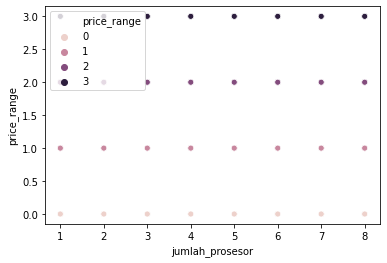

In [39]:
sns.scatterplot(df["jumlah_prosesor"],df["price_range"],hue=df["price_range"])

## jumlah prosesor juga jelas terlihat memiliki pengaruh terhadap harga

## KOLOM KATEGORIKAL

### Bluetooth, Dual Sim, Four_G, Three_G, Touch Screen, Wifi terhadap Kapasitas RAM

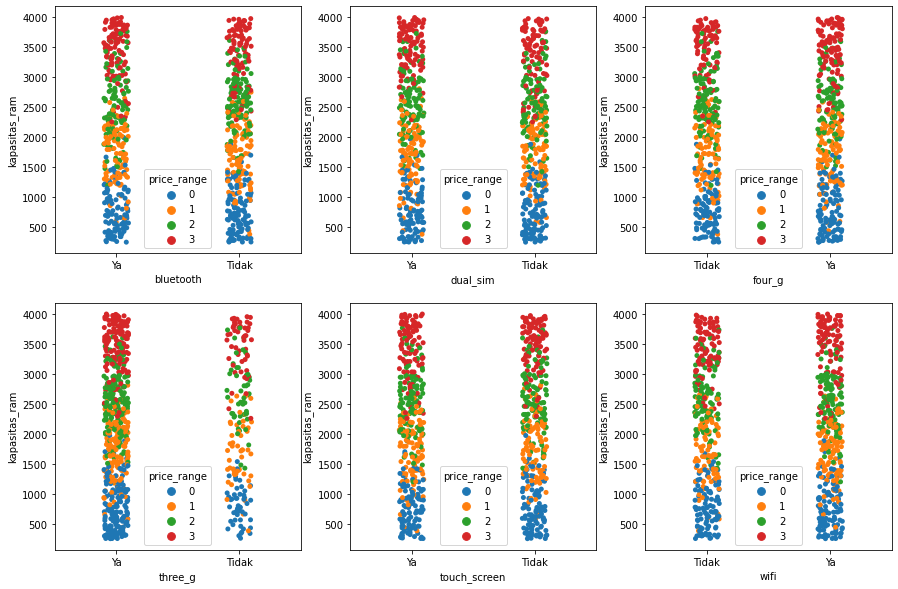

In [40]:
plt.figure(figsize=(15,10))

## Bluetooth
plt.subplot(2,3,1)
sns.stripplot(df["bluetooth"],df["kapasitas_ram"],hue=df["price_range"])

# Dual Sim
plt.subplot(2,3,2)
sns.stripplot(df["dual_sim"],df["kapasitas_ram"],hue=df["price_range"])

# 4G
plt.subplot(2,3,3)
sns.stripplot(df["four_g"],df["kapasitas_ram"],hue=df["price_range"])

#3G
plt.subplot(2,3,4)
sns.stripplot(df["three_g"],df["kapasitas_ram"],hue=df["price_range"])

# Touch Screen
plt.subplot(2,3,5)
sns.stripplot(df["touch_screen"],df["kapasitas_ram"],hue=df["price_range"])

# Wifi
plt.subplot(2,3,6)
sns.stripplot(df["wifi"],df["kapasitas_ram"],hue=df["price_range"])

plt.show()
# semua tidak terlihat memiliki pengaruh yang signifikan terhadap harga
# justru yang terlihat pengaruhnya adalah kapasitas ram

### Bluetooth, Dual Sim, Four_G, Three_G, Touch Screen, Wifi terhadap Daya Tahan Baterai

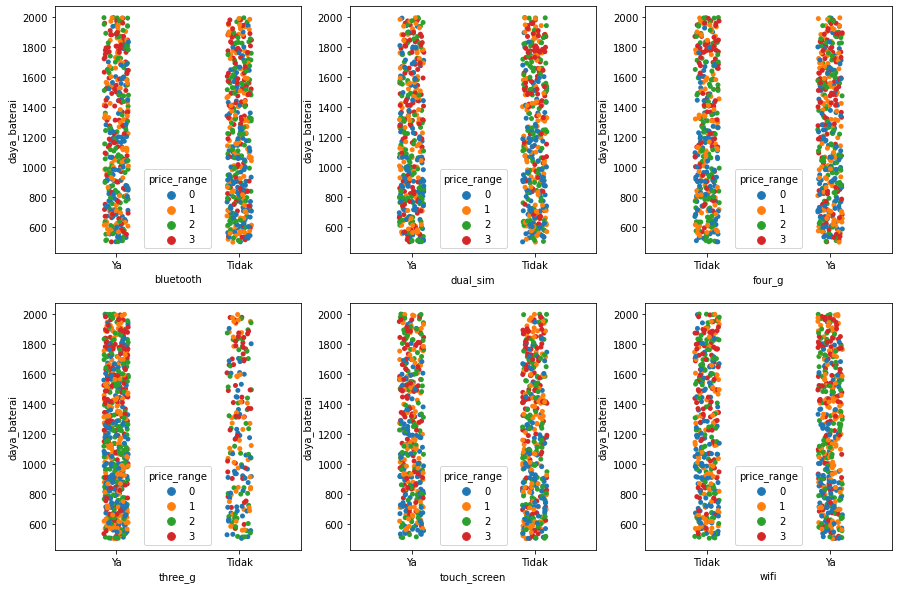

In [41]:
plt.figure(figsize=(15,10))

## Bluetooth
plt.subplot(2,3,1)
sns.stripplot(df["bluetooth"],df["daya_baterai"],hue=df["price_range"])

# Dual Sim
plt.subplot(2,3,2)
sns.stripplot(df["dual_sim"],df["daya_baterai"],hue=df["price_range"])

# 4G
plt.subplot(2,3,3)
sns.stripplot(df["four_g"],df["daya_baterai"],hue=df["price_range"])

#3G
plt.subplot(2,3,4)
sns.stripplot(df["three_g"],df["daya_baterai"],hue=df["price_range"])

# Touch Screen
plt.subplot(2,3,5)
sns.stripplot(df["touch_screen"],df["daya_baterai"],hue=df["price_range"])

# Wifi
plt.subplot(2,3,6)
sns.stripplot(df["wifi"],df["daya_baterai"],hue=df["price_range"])

plt.show()
## juga tidak terlihat pengaruh yang signifikan disini untuk masing-masing kolom kategorikal

# Mencari Korelasi
==> untuk mendukung pemilihat feature

### MELAKUKAN ENCODE TERHADAP KOLOM KATEGORIKAL

In [42]:
kategorik = ['bluetooth', 'dual_sim', 'three_g', 'four_g', 'touch_screen', 'wifi']

In [43]:
for i in kategorik:
    df[i] = df[i].map({
        "Tidak" : 0,
        "Ya" : 1
    })
    
## untuk mempermudah pada saat mencari korelasi
## atau ada beberapa cara lain seperi Cramers V dan Theils U

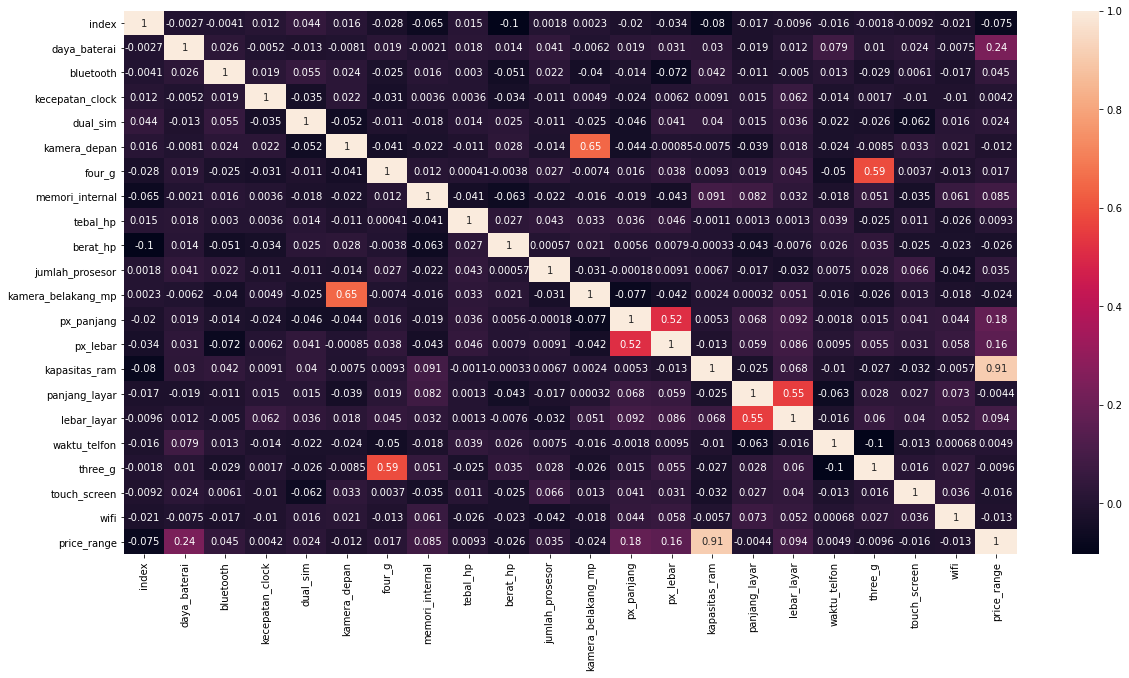

In [44]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [45]:
df.corr()["price_range"].sort_values(ascending=False)

price_range           1.000000
kapasitas_ram         0.910609
daya_baterai          0.237388
px_panjang            0.180050
px_lebar              0.161628
lebar_layar           0.093653
memori_internal       0.085096
bluetooth             0.045033
jumlah_prosesor       0.035363
dual_sim              0.023698
four_g                0.016845
tebal_hp              0.009263
waktu_telfon          0.004859
kecepatan_clock       0.004237
panjang_layar        -0.004426
three_g              -0.009582
kamera_depan         -0.012426
wifi                 -0.012506
touch_screen         -0.015950
kamera_belakang_mp   -0.024312
berat_hp             -0.026160
index                -0.075414
Name: price_range, dtype: float64

    Berdasarkan correlation dan EDA yang dilakukan, kolom yang akan digunakan adalah :
        1. daya_baterai ==> korelasi cukup tinggi dibandingkan yang lain, dan dari EDA terlihat jelas pengaruhnya
        2. px_panjang ==> walaupun secara korelasi cukup rendah, namun dari EDA terlihat memiliki pengaruh yang cukup tinggi terhadap range harga.
        3. px_lebar ==> walaupun secara korelasi cukup rendah, namun dari EDA terlihat memiliki pengaruh yang cukup tinggi terhadap range harga.
        4. berat_hp ==> korelasi negatif wajar, karena yang dicari adalah hp yang tipis, dan dari EDA juga memberikan pengaru yang cukup signifikan terhadap range harga.
        5. tebal_hp ==> secara korelasi rendah, namun dari EDA terlihat pengaruh yang cukup signifikan.
        6. kapasitas_ram ==> korelasi tinggi, EDA juga sangat signifikan pengaruhnya terhadap range harga.
        7. jumlah_prosesor ==> korelasi rendah, tapi dari EDA menunjukkan pengaruh yang cukup signifikan.
        8. Bluetooth ==> secara korelasi, memiliki korelasi yang cukup tinggi.
     
    
         

In [46]:
df = df[["daya_baterai","px_panjang","px_lebar","berat_hp",
         "tebal_hp","kapasitas_ram","jumlah_prosesor","bluetooth","price_range"]]

In [47]:
df = pd.get_dummies(data=df,columns=["bluetooth"],prefix_sep="_")

# melakukan one hot encoding untuk kolom bluetooth karena menurut saya bluetooth tidaklah ordinal

In [48]:
df

,daya_baterai,px_panjang,px_lebar,berat_hp,tebal_hp,kapasitas_ram,jumlah_prosesor,price_range,bluetooth_0,bluetooth_1
1,764,361,511,152,1.0,3148,8,2,0,1
2,1812,380,1550,162,1.0,3338,7,3,0,1
6,1671,398,1263,179,0.9,815,8,0,1,0
7,852,538,730,147,0.4,1275,5,0,0,1
10,1027,1698,1747,103,0.9,3786,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...
1495,1224,522,563,157,1.0,3796,1,3,0,1
1496,1158,311,1796,123,0.7,1542,2,1,1,0
1497,1190,1399,1646,93,0.2,3610,5,3,1,0
1498,1191,179,1813,169,0.9,1028,1,0,1,0


In [49]:
df.to_csv("./Data/df_clean.csv")